# Case Study - Portfolio Optimization
In this case study, we will build two $10,000 investment portfolios containing four stocks. The first portfolio will have an equal weighting between the stocks. The second portfolio will be optimized with a weighting allocation that provides the best return, adjusted for risk. To build these two portfolios, we will:
1. Import two years of data for four stocks
2. Build the initial portfolio with equal weighting to each of the stocks
3. Analyze and visualize the equal-weighted portfolio
4. Generate 10,000 portfolio scenarios with random weighting to each of the stocks
5. Identify the optimal portfolio from the scenarios and visualize the results

## Import Packages & Connect to Data

In [1]:
# Import packages needed for case study
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# List the four stock ticker symbols for our portfolio
stock_list = ['AMD', 'AAPL', 'MSFT', 'ORCL']

# Create an empty dictionary to store our stock info
stocks = {}

# Loop through each stock in the stock_list
for i_stock in stock_list:
    stocks[i_stock] = pd.read_csv(str(i_stock + '.csv'), parse_dates = True, index_col = 'Date')

In [3]:
# Examine the 'AMD' Adj Close from the stocks dictionary
stocks['AMD']

,Adj Close
Date,
2019-01-02,18.830000
2019-01-03,17.049999
2019-01-04,19.000000
2019-01-07,20.570000
2019-01-08,20.750000
...,...
2021-12-23,146.139999
2021-12-27,154.360001
2021-12-28,153.149994


## Create the Equal-Weighted Portfolio
To create the equal-weighted portfolio, we need to add some additional columns to the DataFrames in the `stocks` dictionary. The three columns that we will build are:
* Normalized Return = Adjusted Close / Adjusted Close on the `startdate` of the portfolio
* Allocation = Normalized Return * 0.25 (equal weighting for each of the four stocks)
* Position Value = Allocation * 10,000 (value of the portfolio)

In [4]:
# Create 'Normalized Return' column for each stock
## iloc funcion: return the first row with an index of zero
for stock_name, stock_data in stocks.items():
    first_adj_close = stock_data.iloc[0]['Adj Close']
    stock_data['Normalized Return'] = stock_data['Adj Close']/first_adj_close

In [5]:
stocks['AMD']

,Adj Close,Normalized Return
Date,,
2019-01-02,18.830000,1.000000
2019-01-03,17.049999,0.905470
2019-01-04,19.000000,1.009028
2019-01-07,20.570000,1.092406
2019-01-08,20.750000,1.101965
...,...,...
2021-12-23,146.139999,7.761020
2021-12-27,154.360001,8.197557
2021-12-28,153.149994,8.133298


In [6]:
# Create allocation for each stock - equally weighted in our initial portfolio
for stock_name, stock_data in stocks.items():
    stock_data['Allocation'] = stock_data['Normalized Return'] * .25

In [7]:
stocks['AMD']

,Adj Close,Normalized Return,Allocation
Date,,,
2019-01-02,18.830000,1.000000,0.250000
2019-01-03,17.049999,0.905470,0.226367
2019-01-04,19.000000,1.009028,0.252257
2019-01-07,20.570000,1.092406,0.273101
2019-01-08,20.750000,1.101965,0.275491
...,...,...,...
2021-12-23,146.139999,7.761020,1.940255
2021-12-27,154.360001,8.197557,2.049389
2021-12-28,153.149994,8.133298,2.033324


In [8]:
# Set the value of the portfolio to $10k
for stock_name, stock_data in stocks.items():
    stock_data['Position Value'] = stock_data['Allocation'] * 10000

In [9]:
stocks['AMD']

,Adj Close,Normalized Return,Allocation,Position Value
Date,,,,
2019-01-02,18.830000,1.000000,0.250000,2500.000000
2019-01-03,17.049999,0.905470,0.226367,2263.674895
2019-01-04,19.000000,1.009028,0.252257,2522.570377
2019-01-07,20.570000,1.092406,0.273101,2731.014309
2019-01-08,20.750000,1.101965,0.275491,2754.912385
...,...,...,...,...
2021-12-23,146.139999,7.761020,1.940255,19402.549121
2021-12-27,154.360001,8.197557,2.049389,20493.892888
2021-12-28,153.149994,8.133298,2.033324,20333.244094


## Visualize the Portfolio Performance
To visualize the performance of the portfolio, we can create two line charts that show the return of the portfolio, and the return of the individual stocks, over time. Let's build a new DataFrame that contains just the `position value` for each stock, as well as the total value for the portfolio. We can use this DataFrame to create the two visuals.

In [10]:
# Create position_values dictionary
position_value = {}

for stock_name, stock_data in stocks.items():
    position_value[stock_name] = stock_data['Position Value']

In [11]:
# Convert the position_values dictionary to a DataFrame
position_value = pd.DataFrame(data = position_value)

position_value.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2019-01-02,2500.000000,2500.000000,2500.000000,2500.000000
2019-01-03,2263.674895,2250.980945,2408.029568,2475.674577
2019-01-04,2522.570377,2347.074161,2520.025720,2582.374925
2019-01-07,2731.014309,2341.850477,2523.239483,2623.286049
2019-01-08,2754.912385,2386.493420,2541.534760,2647.059250


In [12]:
# Add 'Total' column to position values, summing the other columns
position_value['Total'] = position_value.sum(axis = 1)


In [13]:
position_value

,AMD,AAPL,MSFT,ORCL,Total
Date,,,,,
2019-01-02,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000
2019-01-03,2263.674895,2250.980945,2408.029568,2475.674577,9398.359984
2019-01-04,2522.570377,2347.074161,2520.025720,2582.374925,9972.045182
2019-01-07,2731.014309,2341.850477,2523.239483,2623.286049,10219.390319
2019-01-08,2754.912385,2386.493420,2541.534760,2647.059250,10329.999814
...,...,...,...,...,...
2021-12-23,19402.549121,11498.632668,8557.007326,5212.638447,44670.827563
2021-12-27,20493.892888,11762.812688,8755.407163,5202.181064,46214.293803
2021-12-28,20333.244094,11694.972982,8724.725417,5150.472621,45903.415114


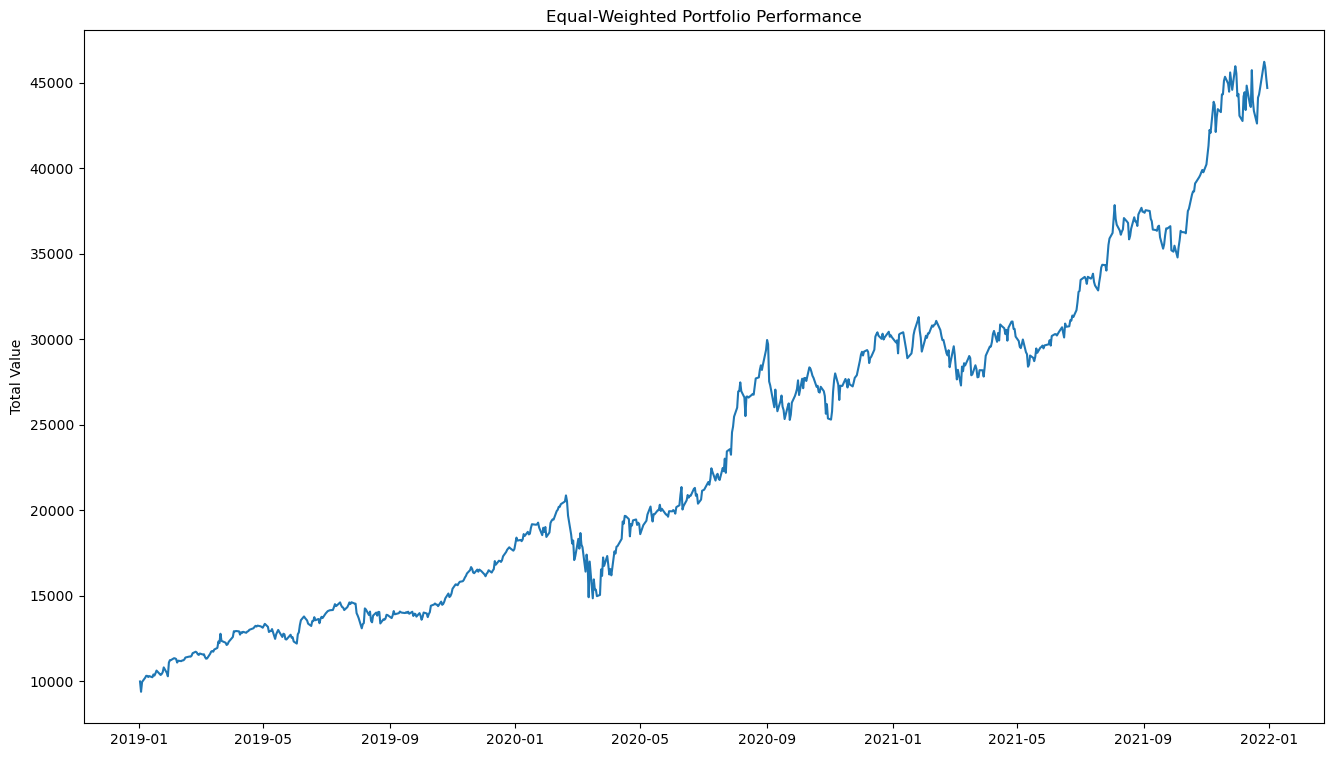

In [14]:
# View the total portfolio
plt.figure(figsize = (16, 9))

plt.plot(position_value['Total'])

plt.title('Equal-Weighted Portfolio Performance')
plt.ylabel('Total Value');

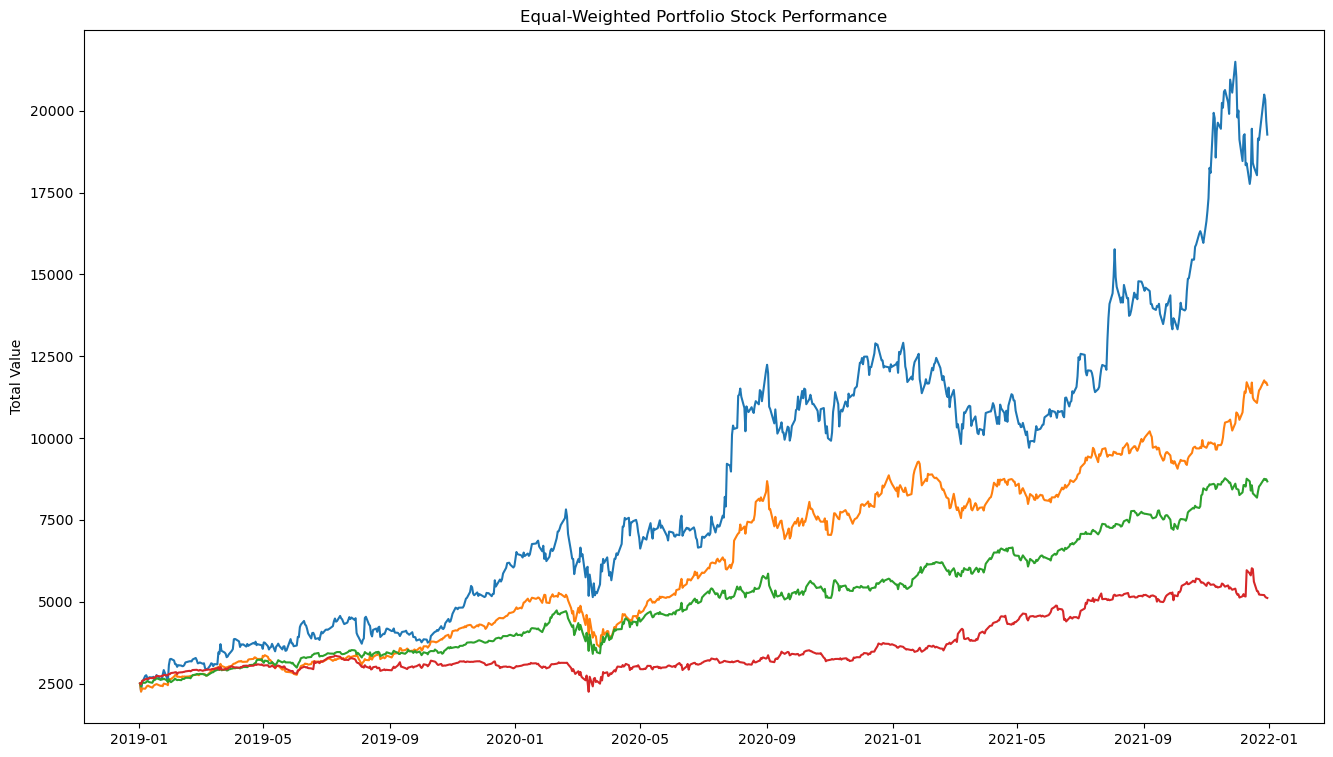

In [15]:
# View the four stocks in the portfolio
plt.figure(figsize = (16, 9))

plt.plot(position_value.iloc[:, 0:4])

plt.title('Equal-Weighted Portfolio Stock Performance')
plt.ylabel('Total Value');

## Calculate Performance Metrics for the Portfolio
Now that we have created and visualized the equal-weighted portfolio, we can calculate a few metrics to further measure the performance of the portfolio. We will create five performances metrics:
 * Cumulative Return
 * Mean Daily Return
 * Standard Deviation Daily Return
 * Sharpe Ratio
 * Annualized Sharpe Ratio

In [16]:
# Define the end and start value of the portfolio
#['-1'] is used to look at the last row
end_value = position_value['Total'][-1]
start_value = position_value['Total'][0]

# Calculate the cumulative portfolio return as a percentage
cumulative_return = end_value/start_value - 1

cumulative_return

3.4683655744152855

In [17]:
# Create a 'Daily Returns' column
position_value['Daily Returns'] = position_value['Total'].pct_change()
position_value.head()

,AMD,AAPL,MSFT,ORCL,Total,Daily Returns
Date,,,,,,
2019-01-02,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000,NaN
2019-01-03,2263.674895,2250.980945,2408.029568,2475.674577,9398.359984,-0.060164
2019-01-04,2522.570377,2347.074161,2520.025720,2582.374925,9972.045182,0.061041
2019-01-07,2731.014309,2341.850477,2523.239483,2623.286049,10219.390319,0.024804
2019-01-08,2754.912385,2386.493420,2541.534760,2647.059250,10329.999814,0.010823


In [18]:
# Calculate the mean Daily Return 
mean_daily_return = position_value['Daily Returns'].mean()

print('The mean daily return is:', str(mean_daily_return))

The mean daily return is: 0.0021983344295164408


In [19]:
# Calculate the standard deviation of Daily Return 
std_daily_return = position_value['Daily Returns'].std()

print('The std daily return is:' , str(std_daily_return))

The std daily return is: 0.020678297369836975


### Sharpe Ratio
Now, let's explore a risk-adjusted return metric called the sharpe ratio. The sharpe ratio helps us to quantify how much return we are getting for a given level of risk. When comparing two different investments, the asset with the higher sharpe ratio provides a higher return for the same amount of risk or the same return for a lower amount of risk. 

It is calculated by taking the average return of the portfolio, minus a risk free rate (such as government bonds), divided by the standard deviation of the return. In this case, we assume the risk-free rate is close 0 so we won't add it to the formula.

In [21]:
# Calculate the sharpe ratio
sharpe_ratio = mean_daily_return/std_daily_return
sharpe_ratio

0.10631119140027011

In [23]:
# Calculate the annualized sharpe ratio
sharpe_ratio_annualised = sharpe_ratio * 250**0.5
sharpe_ratio_annualised

1.6809275279547944

## Prepare Scenarios to Optimize Portfolio Weighting
We need to prepare our data ahead of generating our scenarios to optimize the portfolio weighting. We will:
 * Create a dictionary containing the adjusted close for each of our stocks: stock_adj_close
 * Create another dictionary that transforms the adjusted close for each day to a percent change from the previous day

In [24]:
# Create stock_adj_close dictionary
stock_adj_close = {}

for stock_name, stock_data in stocks.items():
    stock_adj_close[stock_name] = stock_data['Adj Close']

In [25]:
stock_adj_close = pd.DataFrame(data = stock_adj_close)

stock_adj_close.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2019-01-02,18.830000,38.047047,96.632668,42.138145
2019-01-03,17.049999,34.257271,93.077728,41.728134
2019-01-04,19.000000,35.719696,97.406723,43.526596
2019-01-07,20.570000,35.640198,97.530945,44.216164
2019-01-08,20.750000,36.319611,98.238113,44.616867


In [26]:
# Create stock_returns DataFrames to see the day over day change in stock value
stock_returns = stock_adj_close.pct_change()

stock_returns.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,-0.094530,-0.099608,-0.036788,-0.009730
2019-01-04,0.114370,0.042689,0.046509,0.043100
2019-01-07,0.082632,-0.002226,0.001275,0.015842
2019-01-08,0.008751,0.019063,0.007251,0.009062


## Build & Run 10,000 Portfolio Scenarios
Now that we've prepared our data, we're almost ready to run our scenarios. First, we need to build the structures required to generate these scenarios and store the output. To do this, we will use the `numpy.zeros()` function. 

This function creates arrays that are filled with zeros. After we run the scenarios, we replace these zeros with the corresponding output. The reason we create the arrays with zeros first is to give our arrays the correct shape before we replace them with the correct values.

We will create four different arrays:
 * weights_array - this array will have 10,000 rows and 4 columns and hold the weighting allocation for each stock
 * returns_array - this array will contain the portfolio return for each scenario
 * volatility_array - this array will contain the portfolio volatility for each scenario
 * sharpe_array - this array will contain the sharpe ratio for each scenario

In [29]:
# Define the number of scenarios and create a blank array to populate stock weightings for each scenario
scenarios = 10000
## len() is used to determine the size or length of different data structure
weights_array = np.zeros((scenarios, len(stock_returns.columns)))

weights_array

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [31]:
# Create additional blank arrays for scenario output
returns_array = np.zeros(scenarios)
volatility_array = np.zeros(scenarios)
sharpe_array = np.zeros(scenarios)

In [35]:
# Import the random package and set the seeds
import random
random.seed(4)
np.random.seed(4)

for index in range(scenarios):
# Generate four random numbers for each index
    numbers = np.array(np.random.random(4))

# Divide each number by the sum of the numbers to generate the random weight
    weights = numbers/np.sum(numbers)
# Save the weights in weights_array
    weights_array[index, :] = weights
    
# Calculate the return for each scenario
    returns_array[index] = np.sum(stock_returns.mean() * 250 * weights)
    
# Calculate the expected volatility for each scenario
    volatility_array[index] = np.sqrt(np.dot(weights.T, np.dot(stock_returns.cov() * 250, weights)))
    
# Calculate the Sharpe Ratio for each scenario 
    sharpe_array[index] = returns_array[index]/volatility_array[index]

In [36]:
print("The first combination:", weights_array[0])

The first combination: [0.30203048 0.17091594 0.30379654 0.22325704]


In [37]:
print("The sharpe ratio of the first portfolio:", sharpe_array[0])

The sharpe ratio of the first portfolio: 1.7425508874100255


## Identify the Optimal Portfolio
Now that we have the output for all 10,000 scenarios, we can identify the optimal portfolio. The optimal portfolio in this case study is the portfolio that has the highest sharpe ratio.

In [38]:
# Find the highest sharpe ratio in sharpe_array
sharpe_array.max()

1.8244937927396099

In [39]:
# Find the index of the optimal portfolio
index_max_sharpe = sharpe_array.argmax()
index_max_sharpe

7266

In [40]:
# Print the optimal weights for each stock
print(stock_list)
print(weights_array[index_max_sharpe,:])

['AMD', 'AAPL', 'MSFT', 'ORCL']
[0.27326744 0.55796671 0.15346436 0.01530149]


## Visualize the Optimal Portfolio & Portfolio Scenarios
Let's visualize our portfolio scenarios by using a scatter chart. We can use the volatility and returns arrays on each axis to see the relationship between risk and reward. As a final step, we can visualize where the optimal portfolio appears among all of the scenarios.

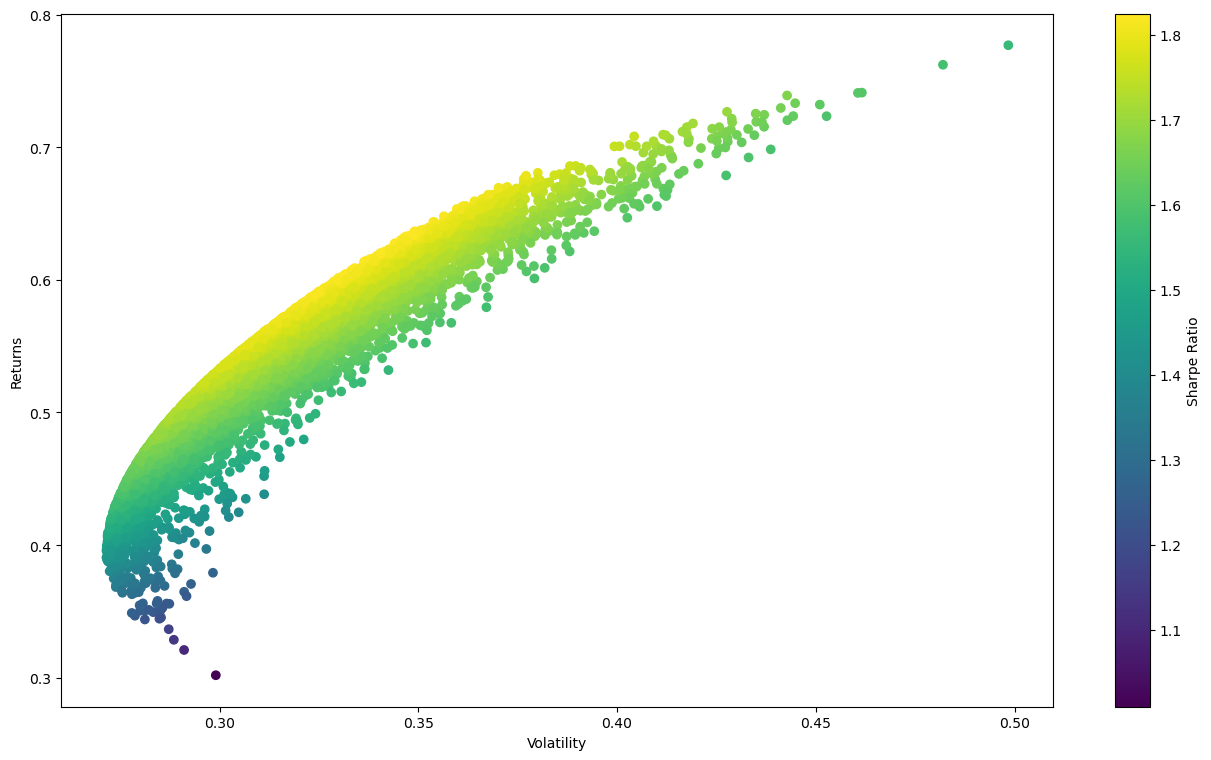

In [41]:
# Visualize volatility vs returns for each scenario
plt.figure(figsize = (16, 9))

plt.scatter(volatility_array, returns_array, c = sharpe_array, cmap = 'viridis')

plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Returns');

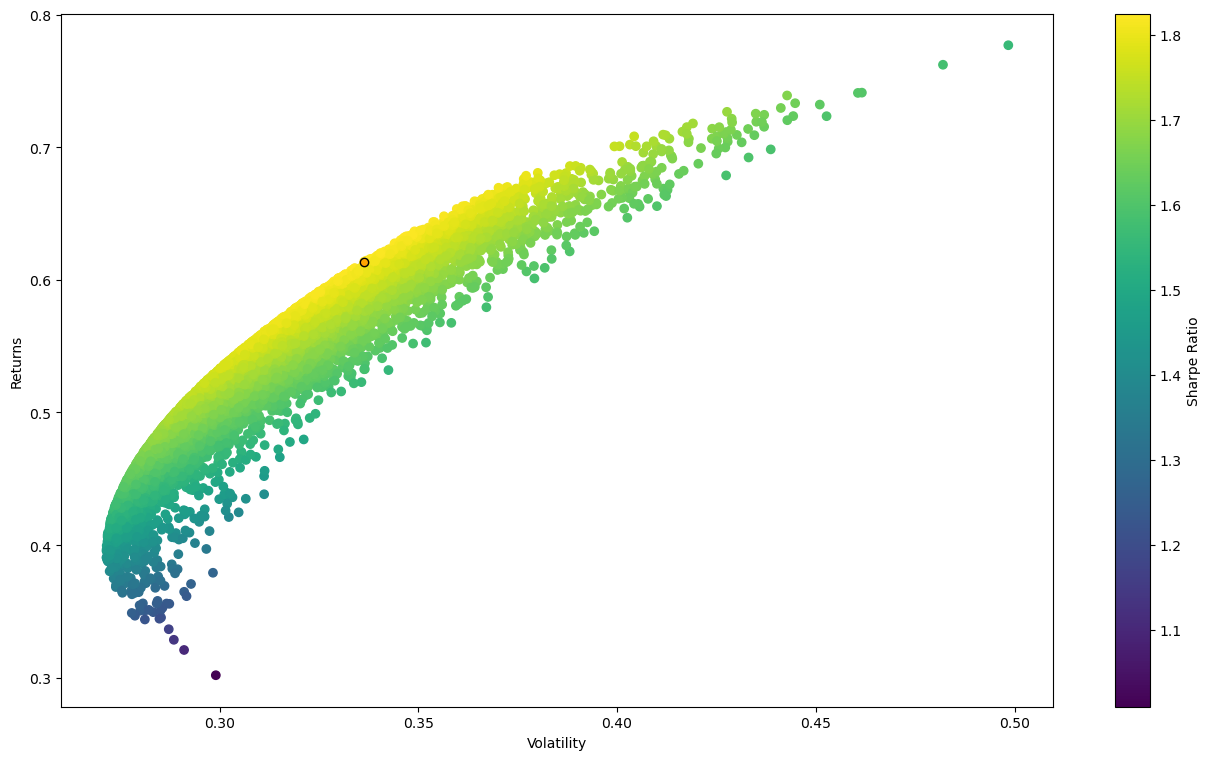

In [42]:
# Identify the optimal portfolio in the returns and volatility arrays
max_sharpe_return = returns_array[index_max_sharpe]
max_sharpe_volatility = volatility_array[index_max_sharpe]
# Visualize volatility vs returns for each scenario
plt.figure(figsize = (16, 9))

plt.scatter(volatility_array, returns_array, c = sharpe_array, cmap = 'viridis')

plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Returns');

# Add the optimal portfolio to the visual
plt.scatter(max_sharpe_volatility, max_sharpe_return, c = 'orange', edgecolors = 'black');